In [1]:
%load_ext autoreload
%autoreload 2
from helper import *
%config InlineBackend.figure_format='retina'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D

cmap = ["#FD6467", "#C6CDF7","#9c1d18", "#D8A499", "#D67236" ]

Get the follow up data

In [2]:
alldata = abcd_data()
alldata_1 = get_data_with_followups(alldata, followups = '1y_follow_up')
followup1year = abcd_data(measurement = '1y_follow_up', load = False, df = alldata_1)
followup1year_1 = prepare_data(followup1year)
item_list_fu = filter_polychoric_corr(followup1year_1, print_corr = False)

In [3]:
aggregates_followup1year = {"cbcl_q8182_Steals": ['cbcl_q81_p', 'cbcl_q82_p'], 
                  "cbcl_q165797_Attacks/Threatens": ['cbcl_q57_p', 'cbcl_q97_p'],
                  "cbcl_q56cf_Stomach_Issues":['cbcl_q56c_p', 'cbcl_q56f_p'],
                  "cbcl_q5355_Weight_Problems":['cbcl_q53_p', 'cbcl_q55_p'],
                  "cbcl_q4070_Hallucinations": ['cbcl_q70_p', 'cbcl_q40_p'],
                  "cbcl_q253848_Peer_Problems": ['cbcl_q25_p', 'cbcl_q48_p', 'cbcl_q38_p'],
                  "cbcl_q222328_Disobeys_Rules": ['cbcl_q28_p', 'cbcl_q23_p', 'cbcl_q22_p'],
                  "cbcl_q21106_Destroys": ['cbcl_q20_p', 'cbcl_q106_p', 'cbcl_q21_p'],
                  "cbcl_q081078_Distracted/Hyperactive": ['cbcl_q10_p', 'cbcl_q78_p', 'cbcl_q08_p'],
                  "cbcl_q5960_SexPlay": ['cbcl_q59_p', 'cbcl_q60_p'],
                  "cbcl_q8485_Strangeness": ['cbcl_q84_p', 'cbcl_q85_p']}


followup1year_2 = aggregate_items(followup1year_1, item_list_fu, aggregates_followup1year)
data_poly_corr_fu = common.polychoric.polychoric_correlation_serial(get_question_items(followup1year_2, 'cbcl_').to_numpy().T,0,3)



## Sex differences
Compare factor scores from each hierarchical level in females and males to investigate if there are significant differences.

In [4]:
followup_sex_corr, factor_scores_F, factor_scores_M = sex_corr(followup1year_2, 6)
followup_sex_corr.to_latex(buf= 'final_results/SexCorrelation_tableFollowUp.tex')
followup_sex_corr.to_csv('final_results/SexCorrelation_tableFollowUp', index=False)


/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_44337/225914635.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  followup_sex_corr.to_latex(buf= 'final_results/SexCorrelation_tableFollowUp.tex')


In [5]:
followup_sex_corr

,Mean_F,SD_F,Mean_M,SD_M,t-value,Cohen's d,adj. p-value
factor_1_1,-0.083359,0.932809,0.076020,1.051817,-8.452906,-0.160325,<.001
factor_2_1,-0.147396,0.868078,0.134419,1.089433,-15.048908,-0.286108,<.001
factor_2_2,0.001253,1.001220,-0.001143,0.998885,0.126692,0.002396,ns
factor_3_1,0.039270,1.014403,-0.035813,0.985318,3.972329,0.075086,<.001
factor_3_2,-0.117904,0.871518,0.107524,1.093182,-11.994233,-0.228031,<.001
factor_3_3,-0.138450,0.900275,0.126261,1.067426,-14.118763,-0.268090,<.001
factor_4_1,-0.116353,0.871889,0.106109,1.093203,-11.834451,-0.224991,<.001
factor_4_2,0.049389,1.024039,-0.045040,0.975384,4.997865,0.094428,<.001
factor_4_3,-0.136205,0.902248,0.124213,1.066411,-13.885823,-0.263649,<.001
factor_4_4,-0.003968,0.938472,0.003619,1.052969,-0.401132,-0.007607,ns


## Regression Analysis

Obtain the data set for gender congruency for follow up year 1

In [6]:
youth_GC = get_gender_congruency('youth', timepoint = '1_year_follow_up_y_arm_1')
parent_GC = get_gender_congruency('parent', timepoint = '1_year_follow_up_y_arm_1')


### Get Factor Scores
match the participants that filled out gender survey and run EFA on them to obtain their factor scores

In [7]:
# match the subjects of the youth and parent gender questionnaire
youth_subjects = youth_GC['src_subject_id'].to_list()
common_subjects_parent = parent_GC[parent_GC.src_subject_id.isin(youth_subjects)]
common_subjects_youth = youth_GC[youth_GC.src_subject_id.isin(common_subjects_parent['src_subject_id'].to_list())]

# match it with baseline and back (5 subjects missing in baseline due to nans)
followup_gender = followup1year_2[followup1year_2.src_subject_id.isin(common_subjects_parent['src_subject_id'].to_list())]
common_followup_gender = common_subjects_parent[common_subjects_parent.src_subject_id.isin(followup_gender['src_subject_id'].to_list())]
followup_gender_df = followup_gender[followup_gender["src_subject_id"].isin(common_followup_gender['src_subject_id'].to_list())]
youth_gender_df = common_subjects_youth[common_subjects_youth["src_subject_id"].isin(common_followup_gender['src_subject_id'].to_list())]
parent_gender_df = common_subjects_parent[common_subjects_parent["src_subject_id"].isin(common_followup_gender['src_subject_id'].to_list())]

# obtain the list of subject IDs in the final df
subjectsList_df = followup_gender_df["src_subject_id"].values


In [8]:
# get the factor scores
gb_factor_scores, gb_rotated_loadings = get_EFA_structure(followup_gender_df, 6, 'geomin_obl', run_again = False)

# add the subject IDs
gb_factor_scores['src_subject_id'] = subjectsList_df


Prepare the dataframes and match their indices

In [9]:
# predictor: sex
X_sex = followup_gender_df.sort_values(by=['src_subject_id'])
encode = OneHotEncoder()
rescaled_sex = X_sex["sex"].to_numpy().reshape(-1, 1)
encode.fit(rescaled_sex)
sex_X = encode.transform(rescaled_sex).toarray()

# predictor: gender congruency kid report
X_gender_kid = youth_gender_df.sort_values(by=['src_subject_id'])
gender_kid_X = get_question_items(X_gender_kid,"gish").to_numpy()

# predictor: gender congruency parent report
X_gender_parent = parent_gender_df.sort_values(by=['src_subject_id'])
gender_adult_X = get_question_items(X_gender_parent,"gish").to_numpy()

# shared predictor arrays
parent_sex_combined_X = np.hstack([gender_adult_X, sex_X])
parent_kid_combined_X = np.hstack([gender_adult_X, gender_kid_X])
kid_sex_combined_X = np.hstack([gender_kid_X, sex_X])
parent_kid_sex_combined_X = np.hstack([gender_adult_X,gender_kid_X, sex_X])


Predict Factor Using Sex

In [10]:
sex_scores, sex_weigths = predict_sex_diff(gb_factor_scores, sex_X, 'Externalizing')
sex_scores.mean() 
sex_weigths.mean()


2.0816681711721685e-17

Predict Factor Using Gender Congruency from Parent data

In [11]:
gender_parent_scores, gender_parent_weigths = predict_sex_diff(gb_factor_scores, gender_adult_X, 'Neurodevelopmental')
gender_parent_scores.mean() 
gender_parent_weigths.mean()


-0.06805315896520843

Predict Factor Using Gender Congruency from Child data

In [12]:
gender_kid_scores, gender_kid_weigths = predict_sex_diff(gb_factor_scores, gender_kid_X, 'Externalizing')
gender_kid_scores.mean()
gender_kid_weigths.mean() 


-0.06076848534614449

Look at the effect directionality of the sex on the Dimensions

In [13]:
sex_scores, sex_weigths_Ext = predict_sex_diff(gb_factor_scores, sex_X, 'Externalizing', cv_no =2)
print(f"Female effect on Externalizing: {sex_weigths_Ext[0]}, Male Effect: {sex_weigths_Ext[1]}.")

sex_scores, sex_weigths_Int = predict_sex_diff(gb_factor_scores, sex_X, 'Internalizing', cv_no =2)
print(f"Female effect on Internalizing: {sex_weigths_Int[0]}, Male Effect: {sex_weigths_Int[1]}.")

sex_scores, sex_weigths_Neuro = predict_sex_diff(gb_factor_scores, sex_X, 'Neurodevelopmental', cv_no =2)
print(f"Female effect on Neurodevelopmental: {sex_weigths_Neuro[0]}, Male Effect: {sex_weigths_Neuro[1]}.")



Female effect on Externalizing: -0.09084198031911063, Male Effect: 0.09084198031911067.
Female effect on Internalizing: 0.04839314111311323, Male Effect: -0.04839314111311324.
Female effect on Neurodevelopmental: -0.13614742123085818, Male Effect: 0.1361474212308582.


Recode Sex into one variable to include it in the interaction

In [14]:
# female coded as 1, male as 0 
recoded_sex = (rescaled_sex=='F').astype(int)

Obtain interaction of sex and gender incongruency parent report 

In [15]:
interaction_df = pd.DataFrame()

for i in range(gender_adult_X.shape[1]):
    
    combined_array = np.concatenate((recoded_sex, gender_adult_X[:,i].reshape(-1,1)), axis = 1)
    
    interaction = PolynomialFeatures(2,interaction_only=True,include_bias=False)
    interaction_terms = interaction.fit_transform(combined_array)
    
    interaction_df['gender_adult_X' + str(i)] = interaction_terms[:,2]
interaction_X = interaction_df.to_numpy()

When looking at the interaction weights, we can see that the more gender congruency increases for females (codes as 1), the lower they score on the externalizing spectrum

In [18]:
interaction_scores, interaction_weigths = predict_sex_diff(gb_factor_scores, interaction_X, 'Neurodevelopmental')
interaction_scores.mean() 
interaction_weigths.mean()


-0.02985736196167534

In [48]:
# female coded as 1, male as 0 
recoded_sex = (rescaled_sex=='F').astype(int)

Obtain interaction of sex and gender incongruency kid report 

In [49]:
kid_interaction_df = pd.DataFrame()

for i in range(gender_kid_X.shape[1]):
    
    combined_array_kid = np.concatenate((recoded_sex, gender_kid_X[:,i].reshape(-1,1)), axis = 1)
    
    interaction_kid = PolynomialFeatures(2,interaction_only=True,include_bias=False)
    interaction_terms_kid = interaction_kid.fit_transform(combined_array_kid)
    
    kid_interaction_df['gender_adult_X' + str(i)] = interaction_terms_kid[:,2]
interaction_kidX = kid_interaction_df.to_numpy()


In [50]:
interaction_scores, interaction_weigths = predict_sex_diff(gb_factor_scores, interaction_kidX, 'Externalizing')
interaction_scores.mean() 
interaction_weigths.mean()



-0.05336410764795989

### Only Individual Predictors and their interaction

In [100]:
factor_list = ['Externalizing', 'Internalizing', 'Neurodevelopmental']

predictor_dict = {'Sex':sex_X, 
                  'Gender Congruency - Parent': gender_adult_X, 
                  'Gender Congruency - Kid': gender_kid_X, 
                  'Interaction Sex & GC Parent': interaction_X,
                  'Interaction Sex & GC Kid': interaction_kidX
                }

full_result_df = get_predictor_df(factor_list, predictor_dict, gb_factor_scores, full = True) 

Obtain only mean R^2 values for each factor and predictor combination

In [88]:
result_df = get_predictor_df(factor_list, predictor_dict, gb_factor_scores) 
result_df

,Factor,Predictor,R^2,adj. p-values
2,Externalizing,Gender Congruency - Kid,-0.0090,1.500000e+01
1,Externalizing,Gender Congruency - Parent,0.0109,2.652686e-02
4,Externalizing,Interaction Sex & GC Kid,-0.0007,9.296901e+00
3,Externalizing,Interaction Sex & GC Parent,0.0146,2.119241e-04
0,Externalizing,Sex,-0.0017,1.178225e+01
7,Internalizing,Gender Congruency - Kid,-0.0126,1.498955e+01
6,Internalizing,Gender Congruency - Parent,-0.0015,9.316946e+00
9,Internalizing,Interaction Sex & GC Kid,-0.0125,1.499759e+01
8,Internalizing,Interaction Sex & GC Parent,-0.0058,1.367471e+01
5,Internalizing,Sex,-0.0129,1.499818e+01


Simplify the adjusted p-values according to significance

In [89]:
simplified_df = result_df.rename(columns= {'adj. p-values': 'sign.'})
simplified_df['sign.'] = simplified_df['sign.'].apply(display_p_val)
simplified_df

,Factor,Predictor,R^2,sign.
2,Externalizing,Gender Congruency - Kid,-0.0090,ns
1,Externalizing,Gender Congruency - Parent,0.0109,*
4,Externalizing,Interaction Sex & GC Kid,-0.0007,ns
3,Externalizing,Interaction Sex & GC Parent,0.0146,***
0,Externalizing,Sex,-0.0017,ns
7,Internalizing,Gender Congruency - Kid,-0.0126,ns
6,Internalizing,Gender Congruency - Parent,-0.0015,ns
9,Internalizing,Interaction Sex & GC Kid,-0.0125,ns
8,Internalizing,Interaction Sex & GC Parent,-0.0058,ns
5,Internalizing,Sex,-0.0129,ns


In [98]:
# export the results
simplified_df.to_csv('final_results/LinearRegression_followup', index=False)
simplified_df.to_latex(buf= 'final_results/LinearRegression_followup.tex')


### Predictors, their Interaction and combinations
to investigate if the predictors explain the same or different parts of the variance

In [95]:
factor_list = ['Externalizing', 'Internalizing', 'Neurodevelopmental']

predictor_dict_full = {'Sex':sex_X, 
                  'Gender Congruency - Parent': gender_adult_X, 
                  'Gender Congruency - Kid': gender_kid_X, 
                  'Sex & GC Parent': parent_sex_combined_X, 
                  'Sex & GC Kid': kid_sex_combined_X, 
                  'GC Parent & GC Kid': parent_kid_combined_X, 
                  'Sex & GC Parent & GC Kid': parent_kid_sex_combined_X,
                  'Interaction Sex & GC Parent': interaction_X}

result_df_full = get_predictor_df(factor_list, predictor_dict_full, gb_factor_scores)
result_df_full

,Factor,Predictor,R^2,adj. p-values
5,Externalizing,GC Parent & GC Kid,0.0112,3.669355e-02
2,Externalizing,Gender Congruency - Kid,-0.0090,2.400000e+01
1,Externalizing,Gender Congruency - Parent,0.0109,4.244298e-02
7,Externalizing,Interaction Sex & GC Parent,0.0146,3.390786e-04
0,Externalizing,Sex,-0.0017,1.885160e+01
4,Externalizing,Sex & GC Kid,0.0001,1.151131e+01
3,Externalizing,Sex & GC Parent,0.0114,3.842865e-02
6,Externalizing,Sex & GC Parent & GC Kid,0.0118,3.061229e-02
13,Internalizing,GC Parent & GC Kid,-0.0016,1.497557e+01
10,Internalizing,Gender Congruency - Kid,-0.0126,2.398327e+01


In [99]:
# export the results
result_df_full.to_csv('final_results/LinearRegression_followup_full', index=False)
result_df_full.to_latex(buf= 'final_results/LinearRegression_followup_full.tex')


## Plots

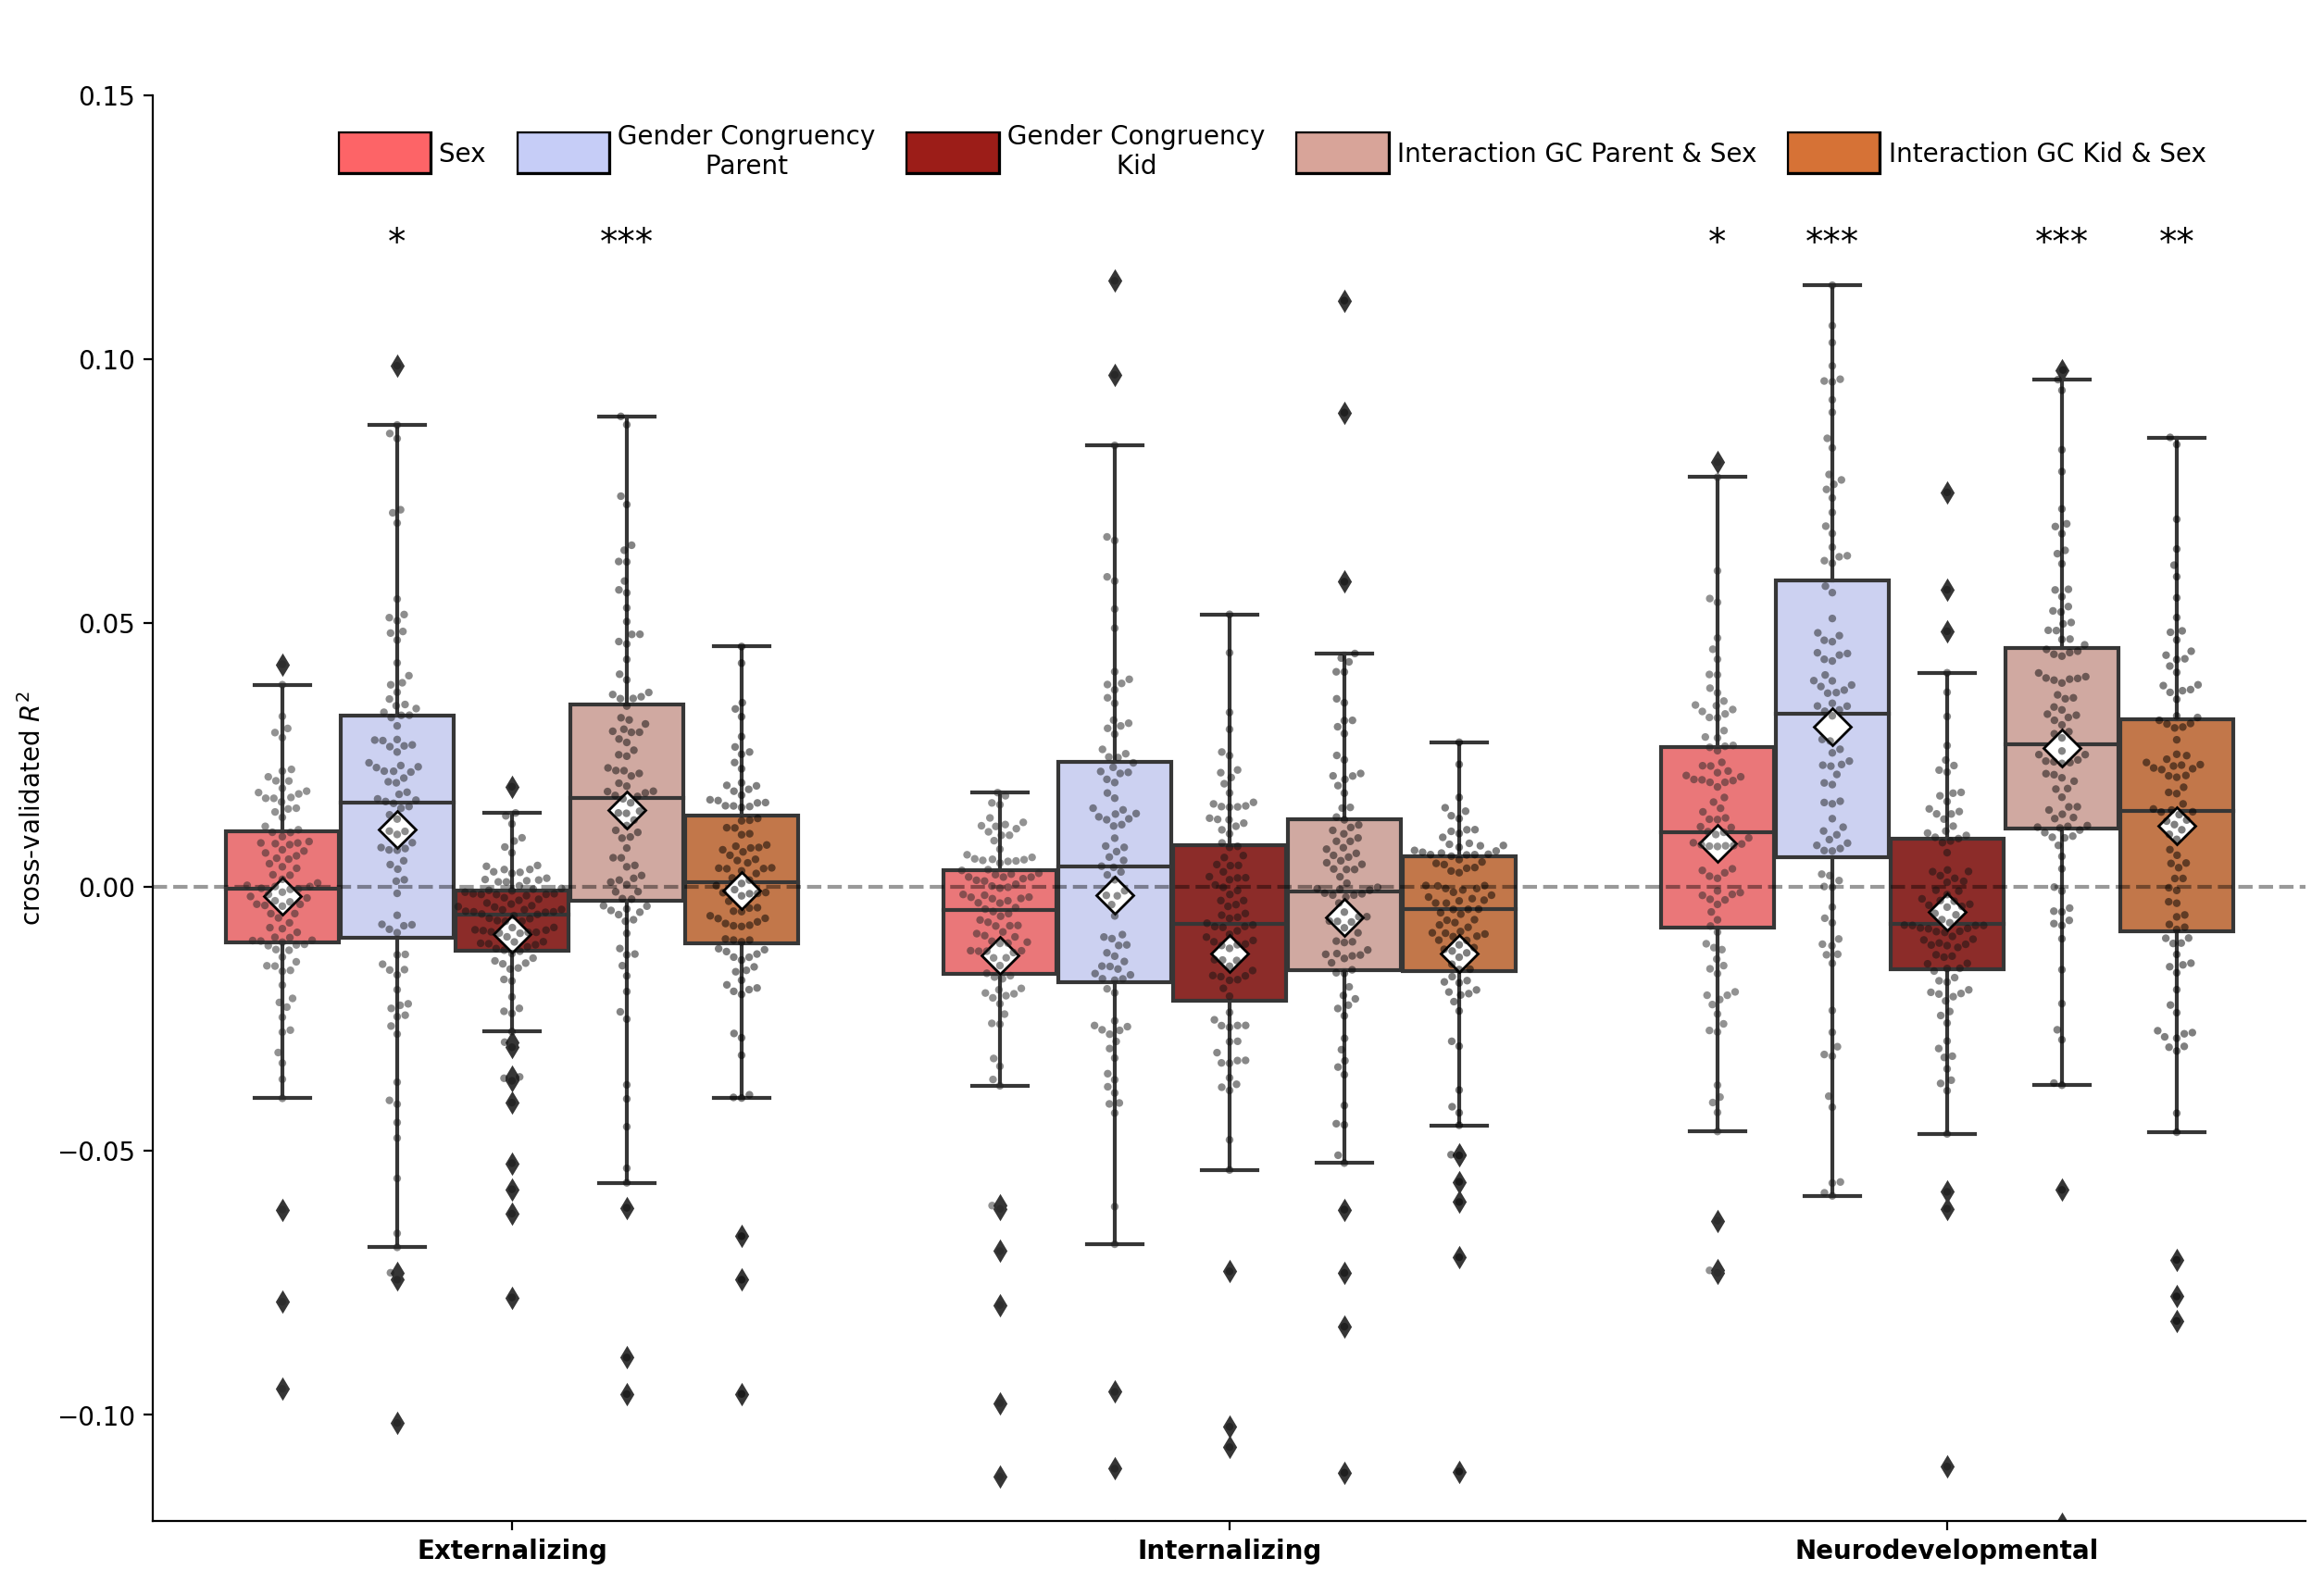

In [107]:
result_df_main = full_result_df

fig,axs = plt.subplots(1,figsize=(15, 10))

sns.swarmplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    color="k",
    size=3,
    alpha=.5,
    ax=axs,
    dodge=True,
)

sns.boxplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    ax=axs,
    showmeans=True,
    palette= cmap,
    meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}
)

axs.get_legend().remove()
axs.set_xlabel("")
axs.set_ylabel(r"cross-validated $R^2$")
axs.axhline(y=0,color = 'k',linestyle = '--',alpha=.4)
axs.set_ylim(-.12, .15)

axs.text(x = -0.16, y= 0.12, s= '*', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 0.16, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')

axs.text(x = 1.68, y= 0.12, s= '*', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 1.84, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 2.16, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 2.32, y= 0.12, s= '**', fontsize = 14, horizontalalignment = 'center')



axs.set_xticklabels(axs.get_xticklabels(), fontdict={'weight':'bold'})

custom_legend_lines = [Line2D([0], [0], color=x, lw=15, path_effects=[pe.Stroke(linewidth=17, foreground='k'), pe.Normal()]) for x in cmap]
legend = fig.legend(custom_legend_lines, [" Sex"," Gender Congruency\n Parent"," Gender Congruency\n Kid", " Interaction GC Parent & Sex", " Interaction GC Kid & Sex"], loc=(.15,.88),ncol=5,frameon=False)
for t in legend.get_texts():
    t.set_ha('center')

# save the plot
plt.savefig("final_results/boxplots_followup_interaction.svg")

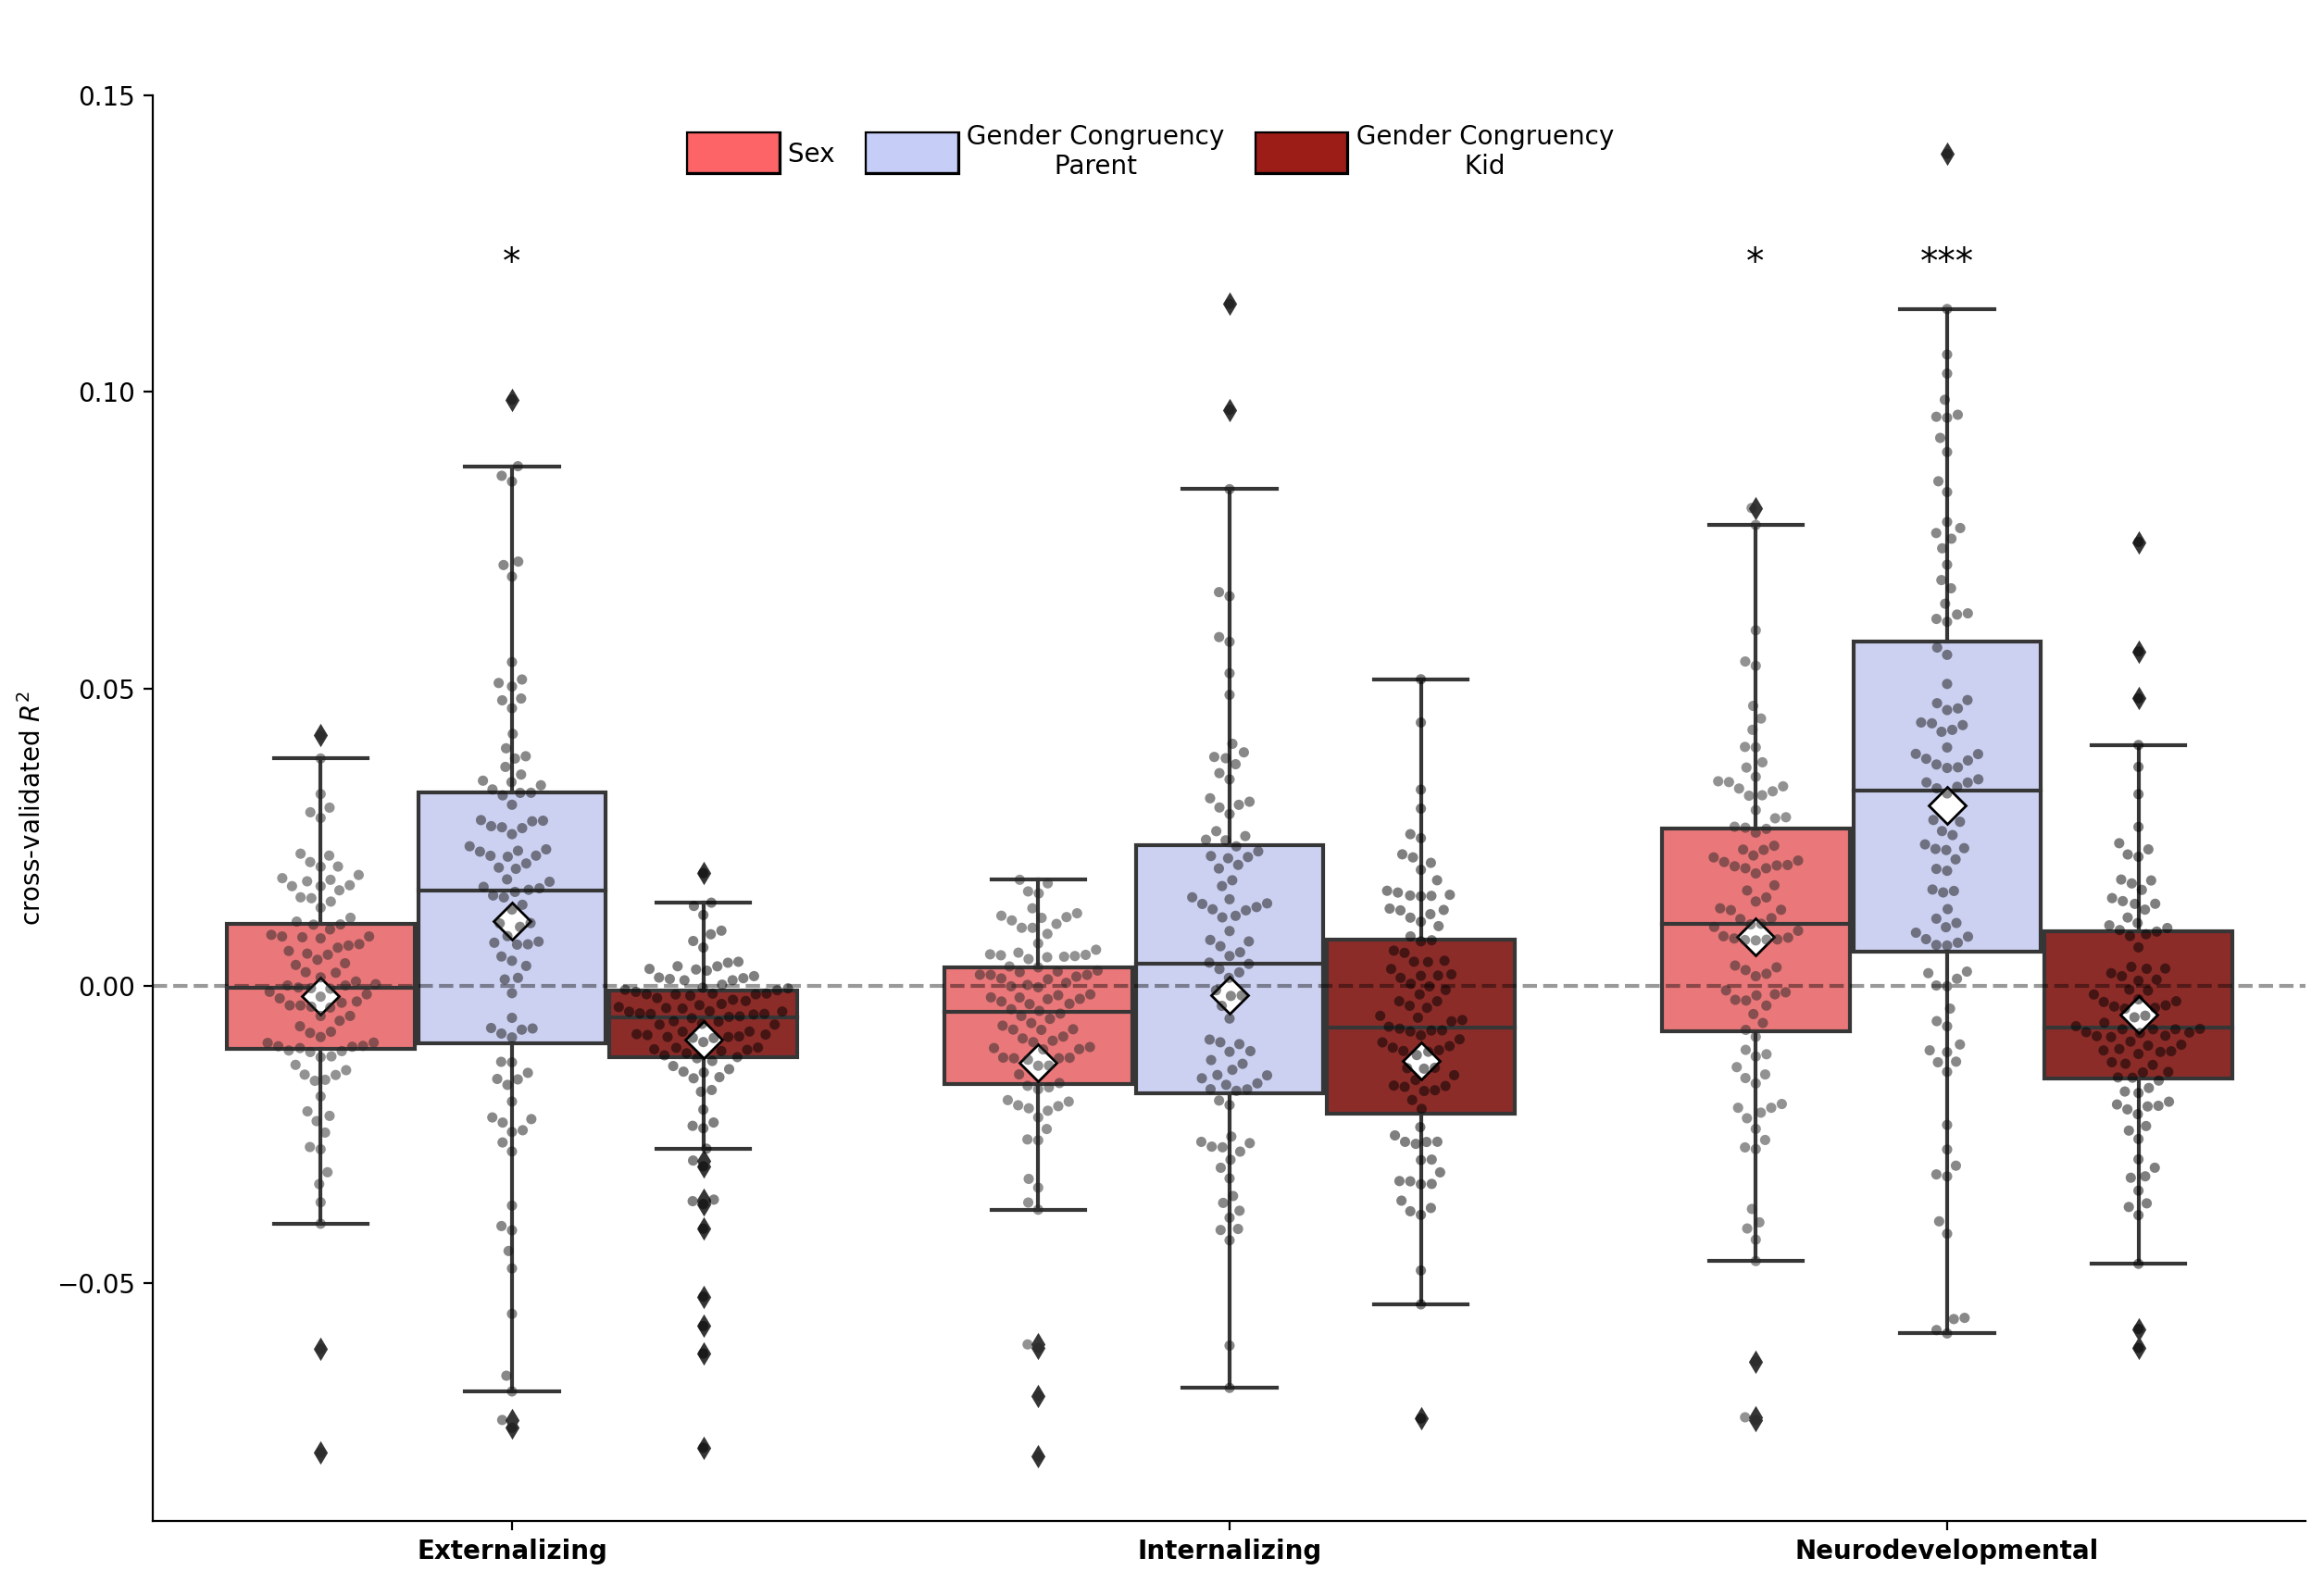

In [104]:
# without interaction
result_df_main = full_result_df[~full_result_df.Predictor.str.contains("&")]

fig,axs = plt.subplots(1,figsize=(15, 10))

sns.swarmplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    color="k",
    size=4,
    alpha=.5,
    ax=axs,
    dodge=True,
)

sns.boxplot(
    data=result_df_main,
    x="Factor",
    y="R^2",
    hue="Predictor",
    ax=axs,
    showmeans=True,
    meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}
)

axs.get_legend().remove()
axs.set_xlabel("")
axs.set_ylabel(r"cross-validated $R^2$")
axs.axhline(y=0,color = 'k',linestyle = '--',alpha=.4)
axs.set_ylim(-.09, .15)

axs.text(x = 0, y= 0.12, s= '*', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 1.7325, y= 0.12, s= '*', fontsize = 14, horizontalalignment = 'center')
axs.text(x = 2, y= 0.12, s= '***', fontsize = 14, horizontalalignment = 'center')

axs.set_xticklabels(axs.get_xticklabels(), fontdict={'weight':'bold'})

custom_legend_lines = [Line2D([0], [0], color=x, lw=15, path_effects=[pe.Stroke(linewidth=17, foreground='k'), pe.Normal()]) for x in cmap]
legend = fig.legend(custom_legend_lines, [" Sex"," Gender Congruency\n Parent"," Gender Congruency\n Kid"], loc=(.3,.88),ncol=3,frameon=False)
for t in legend.get_texts():
    t.set_ha('center')

# save the plot
plt.savefig("final_results/boxplots_followup.svg")

## Permutation Tests

In [198]:
# run permutations to show that the models actually predict stuff 
from sklearn.model_selection import permutation_test_score

y = gb_factor_scores.sort_values(by=['src_subject_id'])
y_df = y.rename(columns = {0: 'Externalizing', 1: 'Internalizing', 
                           2: 'Neurodevelopmental', 3: 'Detachment',
                           4: 'Somatoform', 5: 'Antisocial Behavior'})

permutation_result = []

predictor_dict = {'Sex':sex_X, 
                  'Gender Congruency - Parent': gender_adult_X, 
                  'Gender Congruency - Kid': gender_kid_X}

for factor in factor_list:

    for predictor in predictor_dict:
        real, permutations , p = permutation_test_score(LinearRegression(), 
                                             predictor_dict[predictor],
                                             y=y_df[factor],cv=100,n_permutations=1000,
                                             n_jobs=-1)
        
        # Bonferroni correction
        p_adj = p * 9
        current_list = []
        current_list = [factor, predictor, p, p_adj]
        permutation_result.append(current_list)
        
        print(f'Finished {factor} with this predictor: {predictor}.')

permutation_result

Finished Externalizing with this predictor: Sex.
Finished Externalizing with this predictor: Gender Congruency - Parent.
Finished Externalizing with this predictor: Gender Congruency - Kid.
Finished Internalizing with this predictor: Sex.
Finished Internalizing with this predictor: Gender Congruency - Parent.
Finished Internalizing with this predictor: Gender Congruency - Kid.
Finished Neurodevelopmental with this predictor: Sex.
Finished Neurodevelopmental with this predictor: Gender Congruency - Parent.
Finished Neurodevelopmental with this predictor: Gender Congruency - Kid.


[['Externalizing', 'Sex', 0.000999000999000999, 0.008991008991008992],
 ['Externalizing',
  'Gender Congruency - Parent',
  0.000999000999000999,
  0.008991008991008992],
 ['Externalizing',
  'Gender Congruency - Kid',
  0.00999000999000999,
  0.0899100899100899],
 ['Internalizing', 'Sex', 0.7312687312687313, 6.581418581418581],
 ['Internalizing',
  'Gender Congruency - Parent',
  0.000999000999000999,
  0.008991008991008992],
 ['Internalizing',
  'Gender Congruency - Kid',
  0.0999000999000999,
  0.8991008991008991],
 ['Neurodevelopmental', 'Sex', 0.000999000999000999, 0.008991008991008992],
 ['Neurodevelopmental',
  'Gender Congruency - Parent',
  0.000999000999000999,
  0.008991008991008992],
 ['Neurodevelopmental',
  'Gender Congruency - Kid',
  0.002997002997002997,
  0.026973026973026972]]

In [334]:
permutation_df = pd.DataFrame (permutation_result, columns = ['Factor', 'Predictor', 'p-value', 'adj. p-value'])
permutation_df['adj. p-value'] = permutation_df['adj. p-value'].apply(display_p_val) 

# export results 
permutation_df.to_latex(buf= 'final_results/Permutation_results.tex')
permutation_df.to_csv('final_results/Permutation_results', index=False)

permutation_df

/var/folders/sk/_dzt21lj39qgwpf96_02xs8h0000gp/T/ipykernel_18654/3083307818.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  permutation_df.to_latex(buf= 'results/Permutation_results.tex')
